In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("../Day-2/after_day2.csv")
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,Age,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Department_Engineering,Department_HR,Department_IT,Department_Marketing,Department_Sales,Department_Support
0,0.838755,0.671912,0.309428,1,-0.800413,-0.080611,1.446652,-0.472225,0.329545,0.990988,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.417391,-1.613684,1.674796,2,0.749570,-1.371824,0.109323,-0.641850,0.466813,1.328531,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.072246,0.523394,1.674796,2,0.646223,0.693543,0.128023,1.222405,-0.925873,1.538871,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.128633,0.818030,-1.618734,3,-0.463377,-0.597619,0.385919,-0.263138,1.484310,0.318106,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.051979,-0.608027,-1.245485,3,1.060640,-1.213543,-0.775577,-1.337523,-1.641691,-0.550647,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
from sklearn.model_selection import train_test_split

X = df[[col for col in df.columns if col != "BurnoutRisk"]]
y = df["BurnoutRisk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=8)


In [11]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score

y_pred_log = log_model.predict(X_test)
print("Accuracy of the model is: ", accuracy_score(y_test, y_pred_log))

Accuracy of the model is:  0.9816666666666667


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log)

array([[416,   9],
       [  2, 173]])

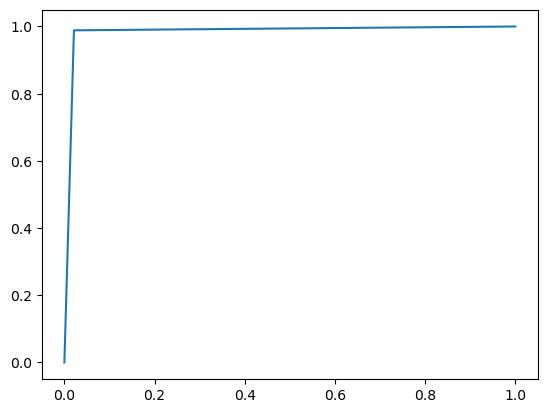

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred_log)

plt.plot(fpr, tpr)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

linear_disciminant = LinearDiscriminantAnalysis(n_components=1)
linear_disciminant.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [18]:
y_pred_disc = linear_disciminant.predict(X_test)

print("Accuracy of LDA is ", accuracy_score(y_test, y_pred_disc))

Accuracy of LDA is  0.9133333333333333


In [20]:
confusion_matrix(y_test, y_pred_disc)

array([[373,  52],
       [  0, 175]])

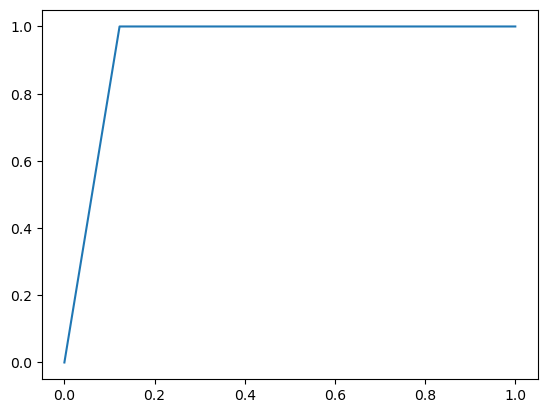

In [ ]:

fpr, tpr, threshold = roc_curve(y_test, y_pred_disc)

plt.plot(fpr, tpr)